In [3]:
from pyiem.util import get_dbconn
from pandas.io.sql import read_sql
pgconn = get_dbconn('mec', user='mesonet')

sql = """select valid, power from turbine_data where 
    valid between '2010-06-30' and '2010-07-02' and power is not null"""
df = read_sql(sql, pgconn)
print "Loaded %s records from database" % (len(df.index),)

Loaded 0 records from database


In [52]:
sql = """
select * from farm_data where valid BETWEEN '2010-06-30' and '2010-07-02' 
and power > 0  ORDER by valid ASC
"""
df2 = psql.frame_query(sql, pgconn)
print "Loaded %s records from database" % (len(df2.index),)

Loaded 30804 records from database


In [53]:
def v(val):
    return (0 if val.day == 30 else 1)* 1440. + val.hour * 60. + val.minute
df['minute'] = df['valid'].map(v)
df2['minute'] = df2['valid'].map(v)
#df2 = df[ (df['yaw'] < 270)&(df['yaw'] > 90)&(df['windspeed'] >= 0)&(df['power']>-1000) ]
#df2 = df[ (df['pitch'] >= 0)&(df['power']>-1000) ]

In [38]:
print max(df2['minute'])

2879.0


<matplotlib.colorbar.Colorbar instance at 0x35574d88>

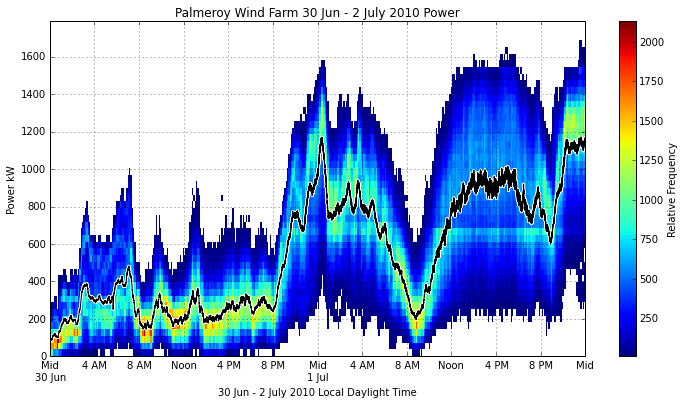

In [61]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

cmap = cm.get_cmap('jet')
cmap.set_under('white')

(fig, ax) = plt.subplots( figsize=(12,6))



counts, xedges, yedges, Image = ax.hist2d(df['minute'], df['power'], bins=(400,50), 
                                          cmap=cmap, cmin=10)

ax.grid(True)
ax.set_xlabel("30 Jun - 2 July 2010 Local Daylight Time")
ax.set_xticks( np.arange(0,2881,240) )
ax.set_xticklabels( ['Mid\n30 Jun', '4 AM', '8 AM', 'Noon', '4 PM', '8 PM', 'Mid\n1 Jul',
                     '4 AM', '8 AM', 'Noon', '4 PM', '8 PM', 'Mid'])
ax.set_ylabel("Power kW")
ax.set_title("Palmeroy Wind Farm 30 Jun - 2 July 2010 Power")

ax.plot(df2['minute'], df2['power'] / 164., color='white', lw=3)
ax.plot(df2['minute'], df2['power'] / 164., color='k', lw=1)


fig.colorbar(Image, label='Relative Frequency')


In [62]:
fig.savefig('/mesonet/share/mec/0.png')